# HW3 Sean Samuel Prajs

## Imports

In [1]:
#General
import pandas as pd
import numpy as np

#Find outliers using seaborne boxplot
import seaborn as sns
import matplotlib.pyplot as plt

#Standardize numerical values
from sklearn.preprocessing import StandardScaler

#Encode Categorical Values
from sklearn.preprocessing import LabelEncoder

#Basic feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#C4.5 Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Gradient Bossting
from sklearn.ensemble import GradientBoostingClassifier

#Neural Network
from sklearn.neural_network import MLPClassifier

#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from imblearn.pipeline import Pipeline

## Preprocessing

### Discovery

In [2]:
data = pd.read_csv("Breast_Cancer_dataset.csv")

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,50.0,White,NaN,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,NaN,Positive,Positive,2.0,1,84,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,NaN,Positive,3.0,1,50,Alive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3823 non-null   float64
 1   Race                    3622 non-null   object 
 2   Marital Status          3703 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              3622 non-null   float64
 10  Estrogen Status         3823 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  3421 non-null   float64
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [5]:
data.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,3823.000000,3622,3703,4024,4024,4024,4024,4024,4024,3622.000000,3823,4024,3421.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3069,2436,1786,2732,1305,2351,2351,3932,NaN,3567,3326,NaN,NaN,NaN,3408
mean,53.931467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.560188,NaN,NaN,14.351652,4.158052,71.297962,NaN
std,8.972253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.428535,NaN,NaN,8.170800,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [6]:
#find the proportions of each category in object features
for i in data.iloc[:,:-1].select_dtypes(include=['object']).columns:
    print(i)
    print('--'*8)
    for j in data[i].unique():
        if isinstance(j,str):
            print(f"{j}: {round((data[i].value_counts()[j]/data.shape[0])*100,2)}%")
        else:
            continue
    print(' '*10)

Race
----------------
White: 76.27%
Black: 6.54%
Other: 7.21%
          
Marital Status
----------------
Married: 60.54%
Divorced: 10.83%
Single : 14.29%
Widowed: 5.39%
Separated: 0.97%
          
T Stage 
----------------
T1: 39.84%
T2: 44.38%
T3: 13.25%
T4: 2.53%
          
N Stage
----------------
N1: 67.89%
N2: 20.38%
N3: 11.73%
          
6th Stage
----------------
IIA: 32.43%
IIIA: 26.09%
IIIC: 11.73%
IIB: 28.08%
IIIB: 1.67%
          
differentiate
----------------
Poorly differentiated: 27.61%
Moderately differentiated: 58.42%
Well differentiated: 13.49%
Undifferentiated: 0.47%
          
Grade
----------------
3: 27.61%
2: 58.42%
1: 13.49%
 anaplastic; Grade IV: 0.47%
          
A Stage
----------------
Regional: 97.71%
Distant: 2.29%
          
Estrogen Status
----------------
Positive: 88.64%
Negative: 6.36%
          
Progesterone Status
----------------
Positive: 82.65%
Negative: 17.35%
          


### Outlier Removal

In [7]:
#find numerical columns
for i in data.select_dtypes(include=['int64','float64']).columns:
    print(i)

Age
Tumor Size
Regional Node Examined
Reginol Node Positive
Survival Months


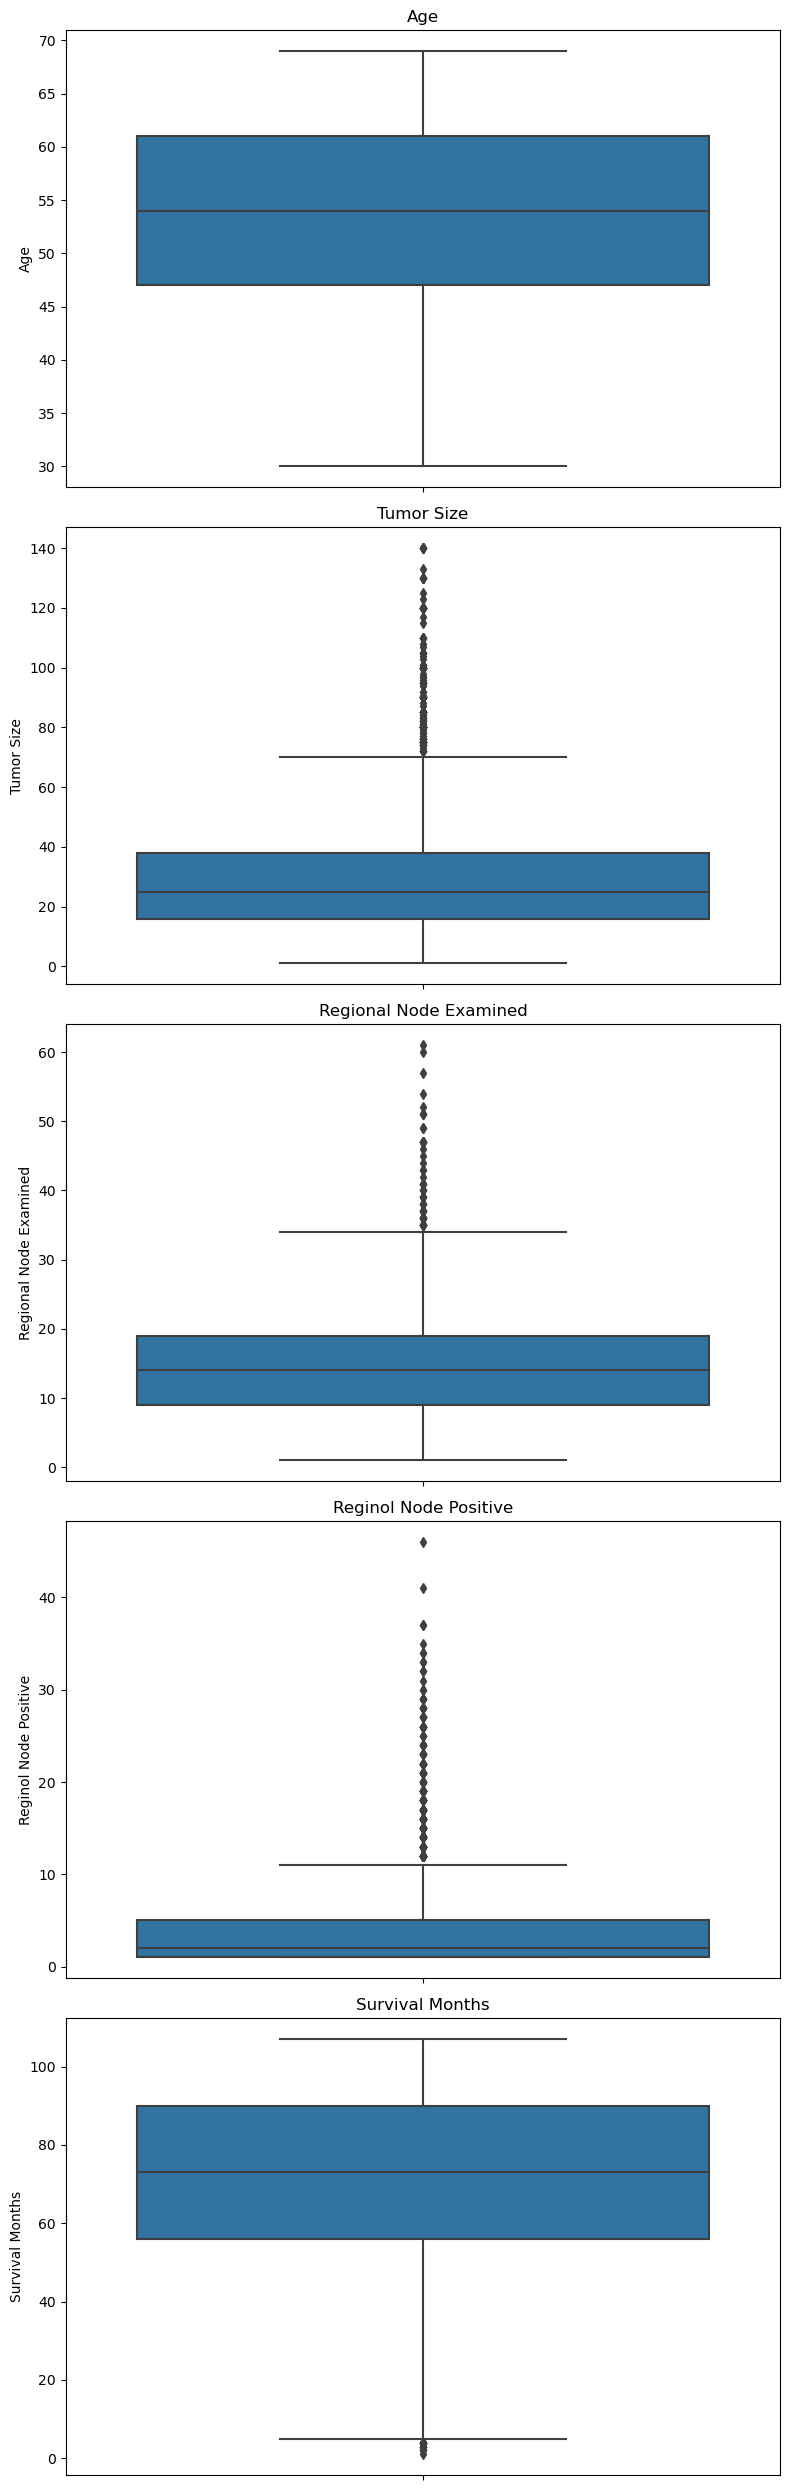

In [8]:
#subplot
fig, axs = plt.subplots(5, 1, figsize=(8, 25))

#plot seaborne boxplot onto plt subplots for each numerical column
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(y=data[data.select_dtypes(include=['int64','float64']).columns[i]], ax=ax)
    ax.set_title(data.select_dtypes(include=['int64','float64']).columns[i])

plt.tight_layout()
plt.show()

Above we can see no outliers for Age.

Outliers bounds for others: </br>
1. <b>Tumor Size:</b> >70 </br>
2. <b>Regional Node Examined:</b> >35 </br>
3. <b>Reginol Node Positive:</b> >12 </br>
4. <b>Survival Months:</b> <8

In [9]:
#rules for filtering out outliers in numerical columns
rules = (data['Tumor Size']<70) & (data['Regional Node Examined']<35) \
& (data['Reginol Node Positive']<12) & (data['Survival Months']>8)

In [10]:
data_no_outliers = data[rules]

### Handle Missing Values

In [11]:
#check for missing values
data_no_outliers.isna().sum()[data_no_outliers.isna().sum()>0]

Age                126
Race               268
Marital Status     201
Estrogen Status    131
dtype: int64

In [12]:
#Remove all rows with outliers
data_missing_removed = data_no_outliers.dropna()

#ratio of how many rows are removed
((data_no_outliers.shape[0]-data_missing_removed.shape[0])
/data_no_outliers.shape[0])*100

25.656877897990725

Rows with missing values make up 25.66% of the total data. We can try dropping all of them for now and continue with ```data_missing_removed ``` in further analysis.





### Standardization

In [13]:
#Use StandardScaler to standardize data
scaler = StandardScaler()
data_missing_removed['Age'] = scaler.fit_transform(data_missing_removed['Age'].values.reshape(-1,1))
data_missing_removed['Tumor Size'] = scaler.fit_transform(data_missing_removed['Tumor Size'].values.reshape(-1,1))
data_missing_removed['Regional Node Examined'] = scaler.fit_transform(data_missing_removed['Regional Node Examined'].values.reshape(-1,1))
data_missing_removed['Reginol Node Positive'] = scaler.fit_transform(data_missing_removed['Reginol Node Positive'].values.reshape(-1,1))
data_missing_removed['Survival Months'] = scaler.fit_transform(data_missing_removed['Survival Months'].values.reshape(-1,1))

/var/folders/8q/g9__pn951hx3tknrzhyt96lh0000gn/T/ipykernel_52961/2074461243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_removed['Age'] = scaler.fit_transform(data_missing_removed['Age'].values.reshape(-1,1))
/var/folders/8q/g9__pn951hx3tknrzhyt96lh0000gn/T/ipykernel_52961/2074461243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_removed['Tumor Size'] = scaler.fit_transform(data_missing_removed['Tumor Size'].values.reshape(-1,1))
/var/folders/8q/g9__pn951hx3tknrzhyt96lh

In [14]:
#The Data is now Standardized
data_missing_removed.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,1.924000e+03,1.924000e+03,1.924000e+03,1.924000e+03,1.924000e+03
mean,-3.563793e-16,-5.170269e-17,-8.309362e-17,1.477220e-17,2.612833e-16
std,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00
min,-2.668855e+00,-1.758590e+00,-1.685804e+00,-7.336341e-01,-3.029548e+00
25%,-7.806650e-01,-7.478274e-01,-7.072921e-01,-7.336341e-01,-7.253943e-01
50%,-3.175078e-03,-2.424463e-01,-8.355274e-03,-3.227136e-01,7.400586e-02
75%,8.020823e-01,4.795266e-01,6.905816e-01,4.991275e-01,8.263825e-01
max,1.662875e+00,3.150827e+00,2.927179e+00,3.375571e+00,1.578759e+00


### Encoding Categorical Variables

In [15]:
#Encode Categorical Variables
les ={}
for col in data_missing_removed.iloc[:,:-1].select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  data_missing_removed[col] = le.fit_transform(data_missing_removed[col])
  les[col] = le

/var/folders/8q/g9__pn951hx3tknrzhyt96lh0000gn/T/ipykernel_52961/2463201698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_removed[col] = le.fit_transform(data_missing_removed[col])
/var/folders/8q/g9__pn951hx3tknrzhyt96lh0000gn/T/ipykernel_52961/2463201698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_removed[col] = le.fit_transform(data_missing_removed[col])
/var/folders/8q/g9__pn951hx3tknrzhyt96lh0000gn/T/ipykernel_52961/2463201698.py:5: SettingWithCopyWarning: 
A val

### Dimensionality Reduction

There are only 16 features:

```
data_missing_removed.shape
(1924, 16)

```
Dimensionality Reduction is not necessary.


### Class Imbalance

In [16]:
#find the proportions of target variable
for i in data['Status'].unique():
    print(f"{i}: {round((data['Status'].value_counts()[i]/data.shape[0])*100,2)}%")

Alive: 84.69%
Dead: 15.31%


This imbalance means that before training a model, the data needs to be rid of its imbalance. This will be done for each model in the modelling section. Random Oversampling will be used.

## Feature Selection

In [17]:
#copy data from preprocessing
data_preprocessed = data_missing_removed.copy().reset_index(drop=True)

In [18]:
#encode labels
data_bfs = data_preprocessed.copy()

#ensure no negative values
for col in data_bfs.iloc[:,:-1].columns:
  data_bfs[col] = data_bfs[col].apply(lambda x:x**2)

#implement SelectKBest
selector = SelectKBest(score_func=chi2,k=10)
X_selected = selector.fit_transform(data_bfs.iloc[:,:-1],data_preprocessed.iloc[:,-1])

#features selected
feature_scores = selector.scores_
feature_pvalues = selector.pvalues_
feature_names = data_bfs.iloc[:,:-1].columns
selected_mask = selector.get_support()

#make dataframe with features and scores
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores,
    'P-Value': feature_pvalues,
    'Selected': selected_mask
}).sort_values(by='Score', ascending=False)  # Sort by score
results_df.reset_index(drop=True, inplace=True)
results_df[results_df['Selected']==True]

,Feature,Score,P-Value,Selected
0,Survival Months,492.198872,4.735489e-109,True
1,6th Stage,292.129089,1.708649e-65,True
2,Reginol Node Positive,169.770742,8.303074e-39,True
3,N Stage,94.405329,2.570991e-22,True
4,Grade,39.789743,2.828265e-10,True
5,T Stage,38.942035,4.365779e-10,True
6,differentiate,16.997526,3.742856e-05,True
7,Marital Status,11.435175,7.206667e-04,True
8,Progesterone Status,6.471745,1.096028e-02,True
9,Age,4.041340,4.439857e-02,True


In [19]:
results_df.to_csv('feature_selection_table.csv')

In [20]:
data_bfs

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,2.408098,4,1,0,0,0,1,9,1,2.377757,1,1,2.338776,0.538219,0.398599,Alive
1,0.194574,4,0,4,4,16,0,4,1,7.385583,1,1,0.017274,2.999439,0.005477,Alive
2,0.113155,4,9,0,0,0,0,4,1,0.149646,1,1,0.476903,0.104144,0.536315,Alive
3,0.113155,4,1,0,0,0,9,1,1,1.570532,1,1,0.082904,0.538219,0.834461,Alive
4,2.427847,4,1,1,0,1,0,4,1,0.112313,1,1,0.322062,0.538219,7.808840,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,1.484973,4,1,1,1,4,0,4,1,1.117471,1,1,1.603874,0.249128,0.065106,Alive
1920,0.000010,4,1,1,0,1,9,1,1,3.165119,1,1,4.965065,0.104144,1.015128,Alive
1921,0.795191,4,1,1,0,1,0,4,1,0.036381,0,0,2.390166,0.538219,6.550080,Dead
1922,2.408098,4,1,1,0,1,0,4,1,0.058780,1,0,0.082904,0.007780,0.043320,Alive


In [21]:
#filter data to only include selected features
selected_feature_names = data_bfs.iloc[:,:-1].columns[selector.get_support()]
#add name of status column to selected_feature_names
selected_feature_names = np.append(selected_feature_names,data_preprocessed.columns[-1])
data_feature_selected = data_preprocessed.copy()
data_feature_selected = data_feature_selected.loc[:,selected_feature_names]
data_feature_selected.head()

,Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,Progesterone Status,Reginol Node Positive,Survival Months,Status
0,1.551805,1,0,0,0,1,3,1,-0.733634,-0.631347,Alive
1,0.441105,0,2,2,4,0,2,1,1.731889,0.074006,Alive
2,-0.336385,3,0,0,0,0,2,1,-0.322714,0.732335,Alive
3,-0.336385,1,0,0,0,3,1,1,-0.733634,-0.913488,Alive
4,-1.558155,1,1,0,1,0,2,1,-0.733634,-2.794430,Dead


## Modeling

### KNN

In [22]:
#Run KNN
data_knn = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_knn.iloc[:,:-1],
    data_knn.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

#Define functions for implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_classify(X_train, y_train, X_test, k=5):
    y_pred = []

    for test_point in X_test.values:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train.values] #Similarity Matrix
        k_nearest_indices = np.argsort(distances)[:k]  #Look for nearest neighbours
        k_nearest_labels = [y_train.iloc[i] for i in k_nearest_indices]
        #Predict the label
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(predicted_label)

    return np.array(y_pred)


#Predict on test set
y_pred = knn_classify(X_train, y_train, X_test, k=5)

#Evaluate KNN
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision = {"KNN":precision_score(y_test, y_pred, pos_label="Dead")}
dead_class_recall = {"KNN":recall_score(y_test, y_pred, pos_label="Dead")}
accuracy = {"KNN":accuracy_score(y_test, y_pred)}

Accuracy: 0.7714285714285715
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.93      0.79      0.86       334
        Dead       0.32      0.63      0.42        51

    accuracy                           0.77       385
   macro avg       0.62      0.71      0.64       385
weighted avg       0.85      0.77      0.80       385

------------------------------
Confusion Matrix: [[265  69]
 [ 19  32]]


### Naïve Bayes

In [23]:
#Run Naive Bayes
data_nb = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_nb.iloc[:,:-1],
    data_nb.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

#Train Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

#Predict on test set
y_pred = nb.predict(X_test)

#Evaluate Naive Bayes
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["Naive Bayes"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["Naive Bayes"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["Naive Bayes"] = accuracy_score(y_test, y_pred)

Accuracy: 0.7766233766233767
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.94      0.79      0.86       334
        Dead       0.33      0.67      0.44        51

    accuracy                           0.78       385
   macro avg       0.63      0.73      0.65       385
weighted avg       0.86      0.78      0.80       385

------------------------------
Confusion Matrix: [[265  69]
 [ 17  34]]


### C4.5 Decision Tree

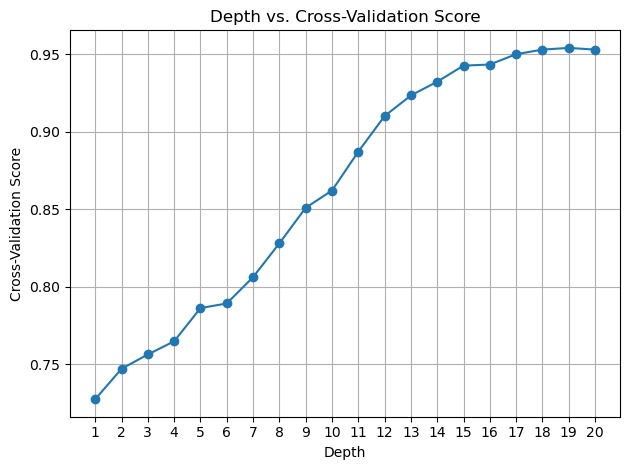

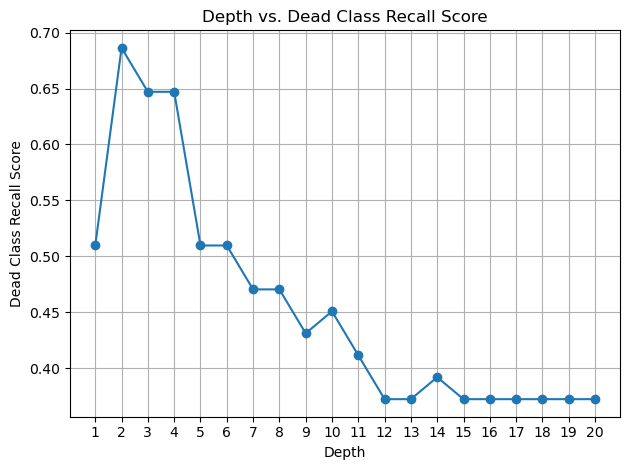

In [24]:
#Run C4.5 Decision tree
data_dt = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_dt.iloc[:,:-1],
    data_dt.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

cv_scores=[]

#Check for best depth
for i in range(1,21):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
  scores = cross_val_score(clf, X_train, y_train, cv=10)
  avg_score = scores.mean()
  cv_scores = np.append(cv_scores,avg_score)


#Visualise depth vs cv scores
import matplotlib.pyplot as plt
plt.plot(range(1,21), cv_scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Cross-Validation Score')
plt.title('Depth vs. Cross-Validation Score')
plt.xticks(range(1,21))
plt.tight_layout()
plt.grid(True)
plt.show()


#Check for precision score for class dead with different depths
recall_scores = []
for i in range(1,21):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  recall_scores = np.append(recall_scores,recall_score(y_test,y_pred, average=None)[1])

#Visualise
plt.plot(range(1,21), recall_scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Dead Class Recall Score')
plt.title('Depth vs. Dead Class Recall Score')
plt.xticks(range(1,21))
plt.tight_layout()
plt.grid(True)
plt.show()

In [25]:
#Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluate Decision Tree
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Visualise the decision tree
print(export_text(clf, feature_names=data_dt.columns[:-1]))

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["C4.5 Decision Tree"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["C4.5 Decision Tree"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["C4.5 Decision Tree"] = accuracy_score(y_test, y_pred)

Accuracy: 0.7818181818181819
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.94      0.80      0.86       334
        Dead       0.34      0.69      0.45        51

    accuracy                           0.78       385
   macro avg       0.64      0.74      0.66       385
weighted avg       0.86      0.78      0.81       385

------------------------------
Confusion Matrix: [[266  68]
 [ 16  35]]
|--- Survival Months <= -1.22
|   |--- Age <= 0.83
|   |   |--- class: Dead
|   |--- Age >  0.83
|   |   |--- class: Dead
|--- Survival Months >  -1.22
|   |--- Survival Months <= -0.65
|   |   |--- class: Dead
|   |--- Survival Months >  -0.65
|   |   |--- class: Alive



Still used standardised data here, given that I am not developing a model for real-life implementation, I decided that higher accuracy, precision, and recall would be better than complete explainability.

### Random Forest

In [26]:
#Run Random Forest
data_rf = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_rf.iloc[:,:-1],
    data_rf.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

#Train random forest
ctf = RandomForestClassifier(n_estimators=100, random_state=42)
ctf.fit(X_train, y_train)

#Predict on test set
y_pred = ctf.predict(X_test)

#Evaluate random forest
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["Random Forest"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["Random Forest"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)

Accuracy: 0.8857142857142857
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.92      0.95      0.94       334
        Dead       0.59      0.45      0.51        51

    accuracy                           0.89       385
   macro avg       0.75      0.70      0.72       385
weighted avg       0.88      0.89      0.88       385

------------------------------
Confusion Matrix: [[318  16]
 [ 28  23]]


### Gradient Boosting

In [27]:
#Run Gradient Boosting
data_gb = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_gb.iloc[:,:-1],
    data_gb.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

#Train gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=4)
gb.fit(X_train, y_train)

#Predict on test set
y_pred = gb.predict(X_test)

#Evaluate gradient boosting
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["Gradient Boosting"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["Gradient Boosting"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["Gradient Boosting"] = accuracy_score(y_test, y_pred)

Accuracy: 0.8415584415584415
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.94      0.87      0.90       334
        Dead       0.44      0.67      0.53        51

    accuracy                           0.84       385
   macro avg       0.69      0.77      0.72       385
weighted avg       0.88      0.84      0.85       385

------------------------------
Confusion Matrix: [[290  44]
 [ 17  34]]


### Neural Networks

In [28]:
#Run Basic Neural Network
data_nn = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_nn.iloc[:,:-1],
    data_nn.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Resampple
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

#Train neural network
nn = MLPClassifier(hidden_layer_sizes=(50,10),
                   max_iter=1000,
                   activation='relu',
                   solver='adam',
                   random_state=42)
nn.fit(X_train, y_train)

#Predict on test set
y_pred = nn.predict(X_test)

#Evaluate neural network
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["Neural Network"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["Neural Network"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["Neural Network"] = accuracy_score(y_test, y_pred)

Accuracy: 0.8441558441558441
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.91      0.91      0.91       334
        Dead       0.42      0.43      0.42        51

    accuracy                           0.84       385
   macro avg       0.66      0.67      0.67       385
weighted avg       0.85      0.84      0.85       385

------------------------------
Confusion Matrix: [[303  31]
 [ 29  22]]


## Hyperparameter Tuning

###C4.5 Decision Tree

In [29]:
#Hyperparameters to use will be depth and min sample split
data_dt = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_dt.iloc[:,:-1],
    data_dt.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Make grid
grid = {'classifier__max_depth': list(range(1, 21)),
        'classifier__min_samples_split': list(range(10, 101))}

#Scorer for Dead class recall
def recall_dead_class(y_test, y_pred):
    return recall_score(y_test, y_pred, pos_label='Dead')

recall_scorer = make_scorer(recall_dead_class)

#Define the pipeline
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Perform RandomizedSearchCV with the pipeline
search_dt = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=grid,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1
)

#Train Decision Tree Search
search_dt.fit(X_train, y_train)

#Visualize best parameters
results = pd.DataFrame(search_dt.cv_results_)
results = results[['mean_test_score', 'param_classifier__max_depth', 'param_classifier__min_samples_split']]
results.sort_values(by='mean_test_score', ascending=False).head()

,mean_test_score,param_classifier__max_depth,param_classifier__min_samples_split
2,0.617639,2,54
30,0.617639,2,28
25,0.611664,4,68
11,0.611664,4,76
26,0.611664,4,44


In [30]:
#Run decision tree with best parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=54, random_state=42)

#Perform Random Oversampling
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluate Decision Tree
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Visualise the decision tree
print(export_text(clf, feature_names=data_dt.columns[:-1]))

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["C4.5 Decision Tree Hyperparameter Tuned"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["C4.5 Decision Tree Hyperparameter Tuned"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["C4.5 Decision Tree Hyperparameter Tuned"] = accuracy_score(y_test, y_pred)

Accuracy: 0.7818181818181819
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.94      0.80      0.86       334
        Dead       0.34      0.69      0.45        51

    accuracy                           0.78       385
   macro avg       0.64      0.74      0.66       385
weighted avg       0.86      0.78      0.81       385

------------------------------
Confusion Matrix: [[266  68]
 [ 16  35]]
|--- Survival Months <= -1.22
|   |--- Age <= 0.83
|   |   |--- class: Dead
|   |--- Age >  0.83
|   |   |--- class: Dead
|--- Survival Months >  -1.22
|   |--- Survival Months <= -0.65
|   |   |--- class: Dead
|   |--- Survival Months >  -0.65
|   |   |--- class: Alive



### Random Forest

In [31]:
#Hyperparameters to use will be depth and min sample split
data_rf = data_feature_selected.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data_dt.iloc[:,:-1],
    data_dt.iloc[:,-1],
    test_size=0.2,
    random_state=42)

#Make grid
grid = {'classifier__n_estimators': list(range(50,201)),
        'classifier__max_features': ['sqrt', 'log2', None]}

#Define the pipeline
pipeline = Pipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Perform RandomizedSearchCV with the pipeline
search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=grid,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1
)

#Train Random Forest Search
search_rf.fit(X_train, y_train)

#Visualize best parameters
results = pd.DataFrame(search_rf.cv_results_)
results = results[['mean_test_score', 'param_classifier__n_estimators', 'param_classifier__max_features']]
results.sort_values(by='mean_test_score', ascending=False).head()

,mean_test_score,param_classifier__n_estimators,param_classifier__max_features
4,0.424609,53,log2
49,0.419346,193,log2
19,0.419346,132,sqrt
43,0.419346,123,sqrt
41,0.419346,140,sqrt


In [32]:
#Train random forest
ctf = RandomForestClassifier(n_estimators=125, max_features = 'sqrt',random_state=42)

#Perform Random Oversampling
rand_os = RandomOverSampler(random_state=42)
X_train, y_train = rand_os.fit_resample(X_train, y_train)

ctf.fit(X_train, y_train)

#Predict on test set
y_pred = ctf.predict(X_test)

#Evaluate random forest
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("---"*10)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print("---"*10)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

#Save Dead Class Precision, Recall, and Accuracy
dead_class_precision["Random Forest Hyperparameter Tuned"] = precision_score(y_test, y_pred, pos_label="Dead")
dead_class_recall["Random Forest Hyperparameter Tuned"] = recall_score(y_test, y_pred, pos_label="Dead")
accuracy["Random Forest Hyperparameter Tuned"] = accuracy_score(y_test, y_pred)

Accuracy: 0.8883116883116883
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Alive       0.92      0.95      0.94       334
        Dead       0.60      0.47      0.53        51

    accuracy                           0.89       385
   macro avg       0.76      0.71      0.73       385
weighted avg       0.88      0.89      0.88       385

------------------------------
Confusion Matrix: [[318  16]
 [ 27  24]]


## Results Table

In [33]:
#Tabluate Precision, Recall, and Accuracy
results = pd.DataFrame([dead_class_precision, dead_class_recall, accuracy], index=["Precision", "Recall", "Accuracy"])
results = results.transpose()

#Highlight Highest and Lowest Values per column
results_highlited = results.style.highlight_max(color='green').highlight_min(color='red')
results_highlited

,Precision,Recall,Accuracy
KNN,0.316832,0.627451,0.771429
Naive Bayes,0.330097,0.666667,0.776623
C4.5 Decision Tree,0.339806,0.686275,0.781818
Random Forest,0.589744,0.450980,0.885714
Gradient Boosting,0.435897,0.666667,0.841558
Neural Network,0.415094,0.431373,0.844156
C4.5 Decision Tree Hyperparameter Tuned,0.339806,0.686275,0.781818
Random Forest Hyperparameter Tuned,0.600000,0.470588,0.888312


In [34]:
results_highlited.to_excel("results.xlsx")